In [2]:
!pip install transformers
!pip install sacrebleu sentencepiece
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 15.4 MB/s 
     |████████████████████████████████| 120 kB 11.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 2.1 MB/s 
     |████████████████████████████████| 1.3 MB 12.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 1.9 MB/s 
     |████████████████████████████████| 365 kB 4.1 MB/s 
     |████████████████████████████████| 212 kB 62.3 MB/s 
     |████████████████████████████████| 115 kB 60.3 MB/s 
     |████████████████████████████████| 127 kB 48.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfu

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "gdrive/My Drive/data3.csv"

In [5]:
from datasets import load_dataset, DatasetDict
from evaluate import load


raw_datasets = load_dataset("csv", data_files=path, split="train")
metric = load("sacrebleu")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-9e80189eefe2e9da/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


In [6]:
raw_datasets

Dataset({
    features: ['ko', 'eng'],
    num_rows: 5
})

In [7]:
traval_test_datasets = raw_datasets.train_test_split(test_size=0.2)
train_valid_datasets = traval_test_datasets['train'].train_test_split(test_size=0.2)
train_test_valid_datasets = DatasetDict({
    'train': train_valid_datasets['train'],
    'validation': train_valid_datasets['test'],
    'test': traval_test_datasets['test']})

In [8]:
train_test_valid_datasets

DatasetDict({
    train: Dataset({
        features: ['ko', 'eng'],
        num_rows: 3
    })
    validation: Dataset({
        features: ['ko', 'eng'],
        num_rows: 1
    })
    test: Dataset({
        features: ['ko', 'eng'],
        num_rows: 1
    })
})

In [10]:
train_test_valid_datasets['train']['ko']

['내 이름은 권준혁이다.', '저는 학생입니다.', '나는 어제 야구를 했다.']

In [13]:
train_test_valid_datasets['train']['eng']

['My name is Junhyuk Kwon.', 'I am a student.', 'I played baseball yesterday.']

In [ ]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_elements(dataset, num_examples=1):
    assert num_examples <= len(
        dataset
    ), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(train_test_valid_datasets["train"])

,ko,eng
0,강아지와 산책을 가다.,go for a walk with one's dog


In [ ]:
metric

EvaluationModule(name: "sacrebleu", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Produces BLEU scores along with its sufficient statistics
from a source against one or more references.

Args:
    predictions (`list` of `str`): list of translations to score. Each translation should be tokenized into a list of tokens.
    references (`list` of `list` of `str`): A list of lists of references. The contents of the first sub-list are the references for the first prediction, the contents of the second sub-list are for the second prediction, etc. Note that there must be the same number of references for each prediction (i.e. all sub-lists must be of the same length).
    smooth_method (`str`): The smoothing method to use, defaults to `'e

In [17]:
from transformers import AutoTokenizer

model_checkpoint = "Helsinki-NLP/opus-mt-ko-en"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/842k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/813k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


max length 13
avg length 11.333333333333334


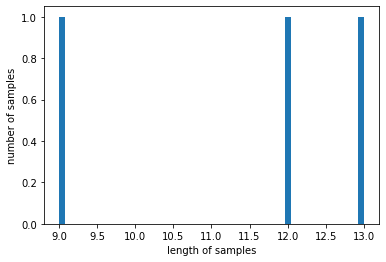

In [11]:
import matplotlib.pyplot as plt

print(f"max length {max(len(l) for l in train_test_valid_datasets['train']['ko'])}")
print(f"avg length {(sum(map(len, train_test_valid_datasets['train']['ko']))/len(train_test_valid_datasets['train']['ko']))}")
plt.hist([len(s) for s in train_test_valid_datasets['train']['ko']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max length 28
avg length 22.333333333333332


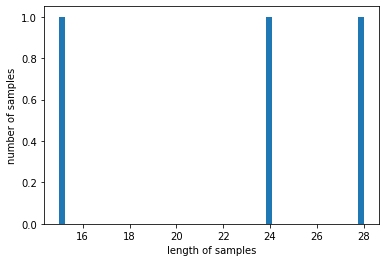

In [12]:
import matplotlib.pyplot as plt

print(f"max length {max(len(l) for l in train_test_valid_datasets['train']['eng'])}")
print(f"avg length {(sum(map(len, train_test_valid_datasets['train']['eng']))/len(train_test_valid_datasets['train']['eng']))}")
plt.hist([len(s) for s in train_test_valid_datasets['train']['eng']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
max_input_length = 128
max_target_length = 128
source_lang = "ko"
target_lang = "eng"


def preprocess_function(examples):

    inputs = [example for example in examples[source_lang]] 
    targets = examples[target_lang]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs

In [19]:
tokenized_datasets = train_test_valid_datasets.map(preprocess_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  "`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your "


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [20]:
tokenized_datasets['train'][1]

{'ko': '저는 학생입니다.',
 'eng': 'I am a student.',
 'input_ids': [415, 6935, 265, 2, 0],
 'attention_mask': [1, 1, 1, 1, 1],
 'labels': [16, 398, 11, 4622, 2, 0]}

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

In [ ]:
batch_size = 16
model_name = model_checkpoint.split("/")[-1]
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-{source_lang}-to-{target_lang}",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=False,
)

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
import numpy as np

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: eng, ko. If eng, ko are not expected by `MarianMTModel.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 3
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 10


Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,No log,0.213614,100.000000,6.000000
2,No log,0.213614,100.000000,6.000000
3,No log,0.213614,100.000000,6.000000
4,No log,0.213614,100.000000,6.000000
5,No log,0.213614,100.000000,6.000000
6,No log,0.213614,100.000000,6.000000
7,No log,0.213614,100.000000,6.000000
8,No log,0.213614,100.000000,6.000000
9,No log,0.213614,100.000000,6.000000
10,No log,0.213614,100.000000,6.000000


The following columns in the evaluation set don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: eng, ko. If eng, ko are not expected by `MarianMTModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: eng, ko. If eng, ko are not expected by `MarianMTModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: eng, ko. If eng, ko are not expected by `MarianMTModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `MarianMTModel.fo

In [ ]:
output = trainer.predict(tokenized_datasets['validation'])

compute_metrics((output.predictions, output.label_ids))


The following columns in the test set don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: eng, ko. If eng, ko are not expected by `MarianMTModel.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1
  Batch size = 16


{'bleu': 100.0, 'gen_len': 6.0}

In [ ]:
results = eval.compute(model_or_pipeline=pipe, data=data, metric=squad_metric,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},
                       strategy="bootstrap", n_resamples=200)

In [ ]:
from transformers import pipeline

translation = pipeline("translation_xx_to_yy", model=model, tokenizer=tokenizer)

In [ ]:
translation("나는 어제 야구를 했다.")

[{'translation_text': 'I played baseball yesterday.'}]

In [ ]:
translation('내 이름은 권준혁이다.')

[{'translation_text': 'My name is Junhyuk Kwon.'}]